![](Cintilla2004.png)

## **Curso de Inteligencia Artificial con Python y Scikit-Leaarn**
### Instructor: Dr. José Gabriel Rodríguez Rivas

<div style="color: blue;">
    <h1> Practica 5: Regresion lineal simple y múltiple</h1>
</div> 

## Regresion lineal 


In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [273]:
autos2 = pd.read_csv("autos_corregidos.csv")
autos2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


### Regresion Simple

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [278]:
lm = LinearRegression()

In [280]:
# variables independientes o variables predictoras
x = autos2[["city-mpg"]]

# Variable dependiente o m i variable objetivo
y = autos2["price"]

In [282]:
x.head(10)

,city-mpg
0,21
1,21
2,19
3,24
4,18
5,19
6,19
7,19
8,17
9,23


In [284]:
lm.fit(x, y)

LinearRegression()

In [286]:
Ypredict = lm.predict(x)

In [288]:
lm.intercept_

34595.600842778265

In [290]:
lm.coef_

array([-849.45322454])

In [292]:
lm.score(x,y)

0.4713797473570377

### Predecir el precio de un vehiculo que tiene un rendimiento de 
### consumo de gasolina de 24 MPG

In [295]:
Ypred = 34595.600 - 849.45 * 24

In [297]:
Ypred

14208.799999999996

In [299]:
predecir = [[24],[12], [8]]

In [301]:
lm.predict(predecir)

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14208.72345381, 24402.16214829, 27799.97504646])

### Regresion lineal Multiple

In [305]:
autos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [307]:
from sklearn.model_selection import train_test_split
autos2_train, autos2_test = train_test_split(autos2, random_state = 0 )

In [309]:
autos2_train.shape

(150, 32)

In [311]:
autos2_test.shape

(51, 32)

##  Regresion lineal multiple

In [314]:
autos2[["horsepower", "engine-size", "city-mpg", "wheel-base", "curb-weight", "price" ]].corr()

,horsepower,engine-size,city-mpg,wheel-base,curb-weight,price
horsepower,1.000000,0.822668,-0.822192,0.371178,0.757981,0.809607
engine-size,0.822668,1.000000,-0.650546,0.572027,0.849072,0.872335
city-mpg,-0.822192,-0.650546,1.000000,-0.470606,-0.749543,-0.686571
wheel-base,0.371178,0.572027,-0.470606,1.000000,0.782097,0.584642
curb-weight,0.757981,0.849072,-0.749543,0.782097,1.000000,0.834415
price,0.809607,0.872335,-0.686571,0.584642,0.834415,1.000000


In [316]:
# Variables predictoras para la fase de entrenaimeto
X_autos2_train = autos2_train[["horsepower", "engine-size", "city-mpg",  "wheel-base", "bore"]]

# Variable a predecir fase de entrenamiento
y_autos2_train = autos2_train[["price"]]

In [318]:
y_autos2_train.shape

(150, 1)

In [320]:
# Variables predictoras para la fase de prueba
X_autos2_test = autos2_test[["horsepower", "engine-size", "city-mpg",  "wheel-base", "bore",]]

# Variable a predecir fase de prueba
y_autos2_test = autos2_test[["price"]]

In [322]:
y_autos2_test.shape

(51, 1)

In [324]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [326]:
# Fase de entrenamiento del modelo lineal   lm   METODO  FIT
lm.fit(X_autos2_train, y_autos2_train)

LinearRegression()

In [328]:
#  ["horsepower", "engine-size", "city-mpg", "curb-weight"]
lm.coef_

array([[   55.87951468,    87.75631659,   -71.38957243,   318.47013286,
        -2035.30729795]])

In [330]:
lm.intercept_

array([-26894.33570544])

In [332]:
lm.score(X_autos2_train, y_autos2_train)

0.7914372491008562

### Fase de prueba

In [335]:
# Fase de prueba del modelo lineal lm  usando el metodo PREDICT

yhat = lm.predict( X_autos2_test )

In [337]:
lm.score( X_autos2_test, y_autos2_test)

0.7991381308637933

##  Evaluar el modelo usando visualización (gráficos)

C:\Users\jgab\AppData\Local\Temp\ipykernel_22796\1786067050.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot( y_autos2_test["price"], hist=False, color="r" )
C:\Users\jgab\AppData\Local\Temp\ipykernel_22796\1786067050.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.di

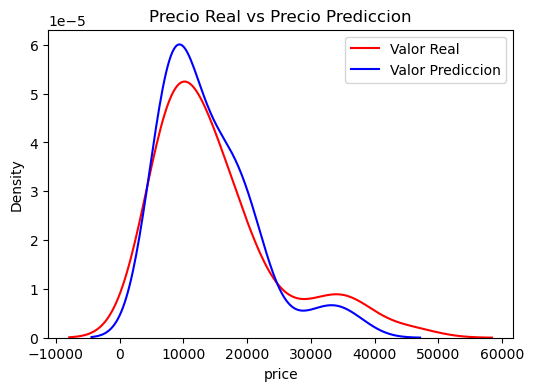

In [340]:
import seaborn as sns
plt.figure(figsize = (6,4))

ax1 = sns.distplot( y_autos2_test["price"], hist=False, color="r" )
ax1 = sns.distplot( yhat, hist=False, color="b", ax =ax1)

plt.title("Precio Real vs Precio Prediccion")
ax1.legend(labels=["Valor Real", "Valor Prediccion"])

plt.show()
plt.close()

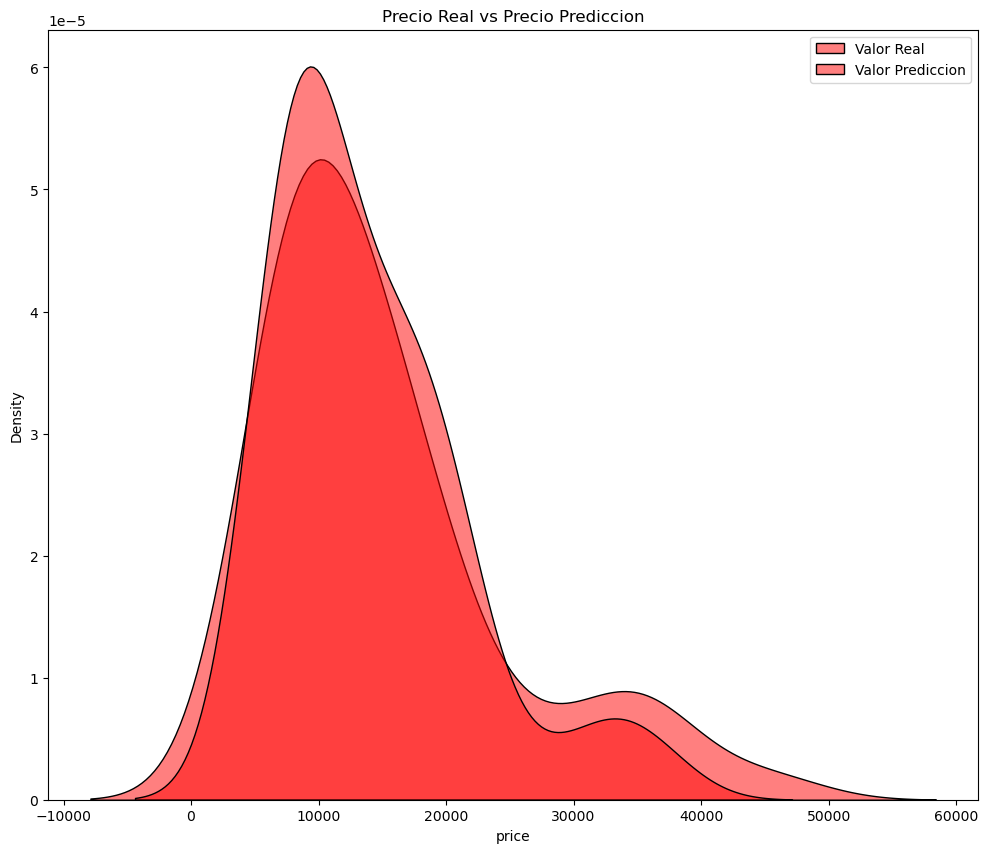

In [342]:
plt.figure(figsize = (12,10))

ax1 = sns.kdeplot( y_autos2_test["price"], multiple="stack", alpha =0.5 , color="r" )
ax1 = sns.kdeplot( pd.Series(yhat.flatten())   , multiple="stack", alpha =0.5 , color="r" )

plt.title("Precio Real vs Precio Prediccion")
ax1.legend(labels=["Valor Real", "Valor Prediccion"])

plt.show()
plt.close()

### Error Absoluto Medio (MAE)

- El Error Absoluto Medio (MAE) es una métrica que **mide la diferencia promedio entre las predicciones del modelo y los valores reales**, sin considerar la dirección del error (es decir, los errores **se consideran en términos absolutos**). 
- En scikit-learn, se puede calcularlo fácilmente después de entrenar un modelo de regresión lineal.

In [357]:
#  Calcular el Error Absoluto Medio (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_autos2_test, yhat)
print(f"Error Absoluto Medio (MAE): {mae}")

Error Absoluto Medio (MAE): 2745.1343471637338


### Error Cuadrático Medio (MSE) y Root Mean Squared Error (RMSE)

- El Error Cuadrático Medio (MSE) mide el promedio de los cuadrados de los errores (diferencias entre los valores predichos y los valores reales). 
- Es una métrica ampliamente utilizada para evaluar modelos de regresión.
- Root Mean Squared Error (RMSE) es simplemente **la raíz cuadrada del MSE**.
- El RMSE tiene la misma unidad que la variable objetivo y puede ser más fácil de interpretar.

In [368]:
# Calcular el Error Cuadrático Medio (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_autos2_test, yhat)
print(f"Error Cuadrático Medio (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Error Cuadrático Medio Raíz (RMSE): {rmse}")

Error Cuadrático Medio (MSE): 17843234.356091157
Error Cuadrático Medio Raíz (RMSE): 4224.125277035609


### Mean Absolute Percentage Error (MAPE)

- El Mean Absolute Percentage Error (MAPE) mide el error promedio absoluto de las predicciones como un porcentaje de los valores reales.
- Es útil porque proporciona una interpretación relativa del error en términos de porcentaje, lo que facilita la comparación en diferentes contextos.
#### Ventajas del MAPE
- **Interpretabilidad**: Expresa el error como un porcentaje, lo que facilita su interpretación.
- **Escalabilidad**: Es independiente de las unidades de la variable objetivo, lo que permite comparar modelos en diferentes conjuntos de datos.

In [383]:
import numpy as np

# Calcular el MAPE
mape = np.mean(np.abs((y_autos2_test - yhat) / y_autos2_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 15.94%


## Interpretación de errores

- El MAE indica que, en promedio, el modelo comete un error de 2,745.13 (pesos o dolares) al predecir el precio de un vehículo.
Significado:
- Si el MAE es bajo en comparación con los precios reales de los vehículos, el modelo tiene un buen desempeño.
- Por ejemplo, si los precios de los vehículos oscilan entre 10,000 y 50,000 (pesos o dolares), un error promedio de 2,745.13 es razonable.
- Si los precios están en un rango menor, como 5,000 a 15,000 (pesos o dolares), este error podría ser considerable.

*Por otro lado, **El MAPE indica** que este error absoluto equivale, en promedio, al **15.94%** del valor real de los precios de los vehículos.*
- Por ejemplo, si un vehículo tiene un precio real de 20,000. El error promedio sería aproximadamente:
20,000 * 0.1594 = 3,188 (pesos o dolares)

Precisión del Modelo:

- Un MAPE de **15.94% generalmente se considera un resultado razonable** en modelos de predicción de precios, dependiendo del contexto:
- MAPE < 10%: Excelente precisión.
- 10% ≤ MAPE < 20%: Buena precisión, aceptable para muchos casos prácticos.
- 20% ≤ MAPE < 50%: Baja precisión, podría mejorarse.
- MAPE ≥ 50%: Mala precisión, el modelo no es confiable.


## Selección de características (feature selection) con scikit-learn

Utilizar las bibliotecas scikit-learn para realizar selección de características (feature selection) mediante el método de Eliminación Recursiva de Características (RFE) con un modelo de Máquina de Vectores de Soporte (SVC).

- RFE (Recursive Feature Elimination): Algoritmo que selecciona características de forma iterativa eliminando las menos importantes según un modelo base.
- SVC (Support Vector Classifier): Un clasificador basado en máquinas de soporte vectorial. En este caso, se usará como modelo base para evaluar la importancia de las características.

    - El modelo SVC se usa para determinar la importancia de las características.
    - El parametro n_features_to_select=4: Indica que RFE debe seleccionar las 4 características más importantes.
    - EL parametro step=1: En cada iteración, se eliminará una característica (la menos importante).
    - Valido para regresion lineal y regresion logistica


In [208]:
# variables predictoras a evaluar y determinar las mejores
z = autos2[["normalized-losses", "horsepower", "engine-size", "city-mpg", "peak-rpm", 
            "curb-weight", "wheel-base", "bore", "stroke", "fuel-type_code"]]

y = autos2["price"]

In [391]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

svc= SVC(kernel = "linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select = 4, step = 1)
rfe.fit(z, y)

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=4)

In [393]:
rfe.support_

array([ True,  True, False,  True, False,  True, False, False, False,
       False])

In [395]:
from sklearn.svm import SVR
estimator = SVR(kernel = "linear")
selector = RFE(estimator, n_features_to_select = 5, step= 1)
selector = selector.fit(z, y)
selector


RFE(estimator=SVR(kernel='linear'), n_features_to_select=5)

In [397]:
rfe.ranking_

array([1, 1, 4, 1, 2, 1, 5, 6, 3, 7])

In [403]:
selector.support_

array([False,  True,  True,  True, False, False,  True, False,  True,
       False])

In [222]:
selector.ranking_

array([2, 1, 1, 1, 6, 4, 1, 3, 1, 5])